--------------------------
**Importing Everything**


This is where I will import all the things I need to work on the final project and the Jupyter Notebook in the beginning.

In [ ]:
#python script imports (ds.py)
import argparse
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np

#extra imports needed for other tasks like exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

#list of machine learning model classification and regression algorithms
from sklearn.linear_model      import LogisticRegression
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier
)
from sklearn.neighbors         import KNeighborsClassifier

#more other scikit-learn (encoding and preprocessing)
from sklearn.pipeline       import Pipeline
from sklearn.compose        import ColumnTransformer
from sklearn.preprocessing  import OneHotEncoder
from sklearn.experimental     import enable_hist_gradient_boosting  # noqa
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold

---------------------
**Exploratory Data Analysis**

I need to review the dev.csv data, since development phase is where I'll perform testings on the data after some procedures with the model. From there, I need to ensure the formatting is correct while debugging before finalizing the submission for test phase. So, first I have to do EDA for any outliers, null values, and other info to have an understanding of the data structure.

In [4]:
#loads dev.csv file
df = pd.read_csv('data/dev.csv')
print(df)

                                encounter_id  \
0       739d0db1-fb93-6999-f85c-c884db3abfef   
1       e29e9cdb-37dc-79fe-25ea-fd2e53463c34   
2       ac8ed32d-fbb6-5759-f7f5-8f109a15a728   
3       8e355cec-2541-c70a-3606-570f2028fac8   
4       1dd3fc7a-60bd-2857-415f-567fee10909f   
...                                      ...   
125953  fcade134-e601-c000-d539-a0c8364c8a02   
125954  1bc54c46-8453-8f53-5d4c-c2751b2c37c4   
125955  e2f63edb-6859-605e-73a8-9a253fb98269   
125956  ae9d06dc-0ad3-5da5-183e-f33859bbe2ae   
125957  d82ba84d-aa4b-9569-9342-a502f1932c91   

                                  patient_id  age gender    race    ethnicity  \
0       1a1da106-d526-aad0-37cf-0943f2071253   58      F   white  nonhispanic   
1       9ac8a441-cace-f832-4adf-a2eceaf06333   41      M   white  nonhispanic   
2       2a4c4143-f877-322d-2081-785d8150ba2b   87      F   white     hispanic   
3       893afda8-3e4a-3568-a1c9-4a75571e6689   80      M   white     hispanic   
4       39d5a6ca-3

There seems to be two ID columns: encounter_id and patient_id. I think I have to drop these two columns before doing the model trainings. But, I could probably try to encode patient_id column into a meaningful numeric column whether possible like group by patient_id and tally the count for example.

In [3]:
#describes the dev.csv file
print(df.describe())

                 age            zip  has_chronic_pain  has_hypertension  \
count  125958.000000  125958.000000          125958.0          125958.0   
mean       47.918624   78597.786453               0.0               0.0   
std        22.873033   23108.892739               0.0               0.0   
min         0.000000       0.000000               0.0               0.0   
25%        32.000000   85087.000000               0.0               0.0   
50%        51.000000   85283.000000               0.0               0.0   
75%        64.000000   85395.000000               0.0               0.0   
max       110.000000   86556.000000               0.0               0.0   

       has_diabetes  has_asthma  has_depression      num_meds  total_med_cost  \
count      125958.0    125958.0        125958.0  62529.000000    6.252900e+04   
mean            0.0         0.0             0.0      1.866686    7.978150e+03   
std             0.0         0.0             0.0      1.946602    4.768517e+05   


In [4]:
#finds the number of missing values in the dev.csv file in each column
print(df.isnull().sum())

encounter_id                     0
patient_id                       0
age                              0
gender                           0
race                             0
ethnicity                        0
zip                              0
payer_type                       0
has_chronic_pain                 0
has_hypertension                 0
has_diabetes                     0
has_asthma                       0
has_depression                   0
num_meds                     63429
total_med_cost               63429
num_procedures               32744
total_proc_cost              32744
pain_score                   65978
height_cm                    99024
encounter_cost                   0
readmitted_within_30_days        0
dtype: int64


Interesting, there are a lot of missing values in number of meds, total med costs, number of procedures, total procedure costs, pain scores, and height in cm. 

In [5]:
#prints total number of values in each column
print(df.count())

encounter_id                 125958
patient_id                   125958
age                          125958
gender                       125958
race                         125958
ethnicity                    125958
zip                          125958
payer_type                   125958
has_chronic_pain             125958
has_hypertension             125958
has_diabetes                 125958
has_asthma                   125958
has_depression               125958
num_meds                      62529
total_med_cost                62529
num_procedures                93214
total_proc_cost               93214
pain_score                    59980
height_cm                     26934
encounter_cost               125958
readmitted_within_30_days    125958
dtype: int64


Seems like there are around 125,958 total rows in the data.

In [8]:
#show the count for value that is 0 and 1 in has_chronic_pain, has_hypertension, has_diabetes, has_asthma, has_depression
print(df['has_chronic_pain'].value_counts())
print(df['has_hypertension'].value_counts())
print(df['has_diabetes'].value_counts())
print(df['has_asthma'].value_counts())
print(df['has_depression'].value_counts())

#prints unique values count for these symptoms columns
print(df['has_chronic_pain'].nunique())
print(df['has_hypertension'].nunique()) 
print(df['has_diabetes'].nunique())
print(df['has_asthma'].nunique())
print(df['has_depression'].nunique())

has_chronic_pain
0    125958
Name: count, dtype: int64
has_hypertension
0    125958
Name: count, dtype: int64
has_diabetes
0    125958
Name: count, dtype: int64
has_asthma
0    125958
Name: count, dtype: int64
has_depression
0    125958
Name: count, dtype: int64
1
1
1
1
1


Weird, even though there are no null values in these symptoms columns above, they only have "0' as an unique value which could mean it is "No" while 1 usually means "Yes" or "True". But I might be wrong. Either way, because all values are the same for these columns, I may consider dropping this column.

Next, I want to see if variables are correlated to each other in any ways so I would plot it.

readmitted_within_30_days    1.000000
age                          0.110793
num_procedures               0.109863
num_meds                     0.102629
total_proc_cost              0.019097
height_cm                    0.009798
pain_score                   0.008475
zip                          0.001194
total_med_cost              -0.001682
encounter_cost              -0.070702
has_chronic_pain                  NaN
has_hypertension                  NaN
has_diabetes                      NaN
has_asthma                        NaN
has_depression                    NaN
Name: readmitted_within_30_days, dtype: float64


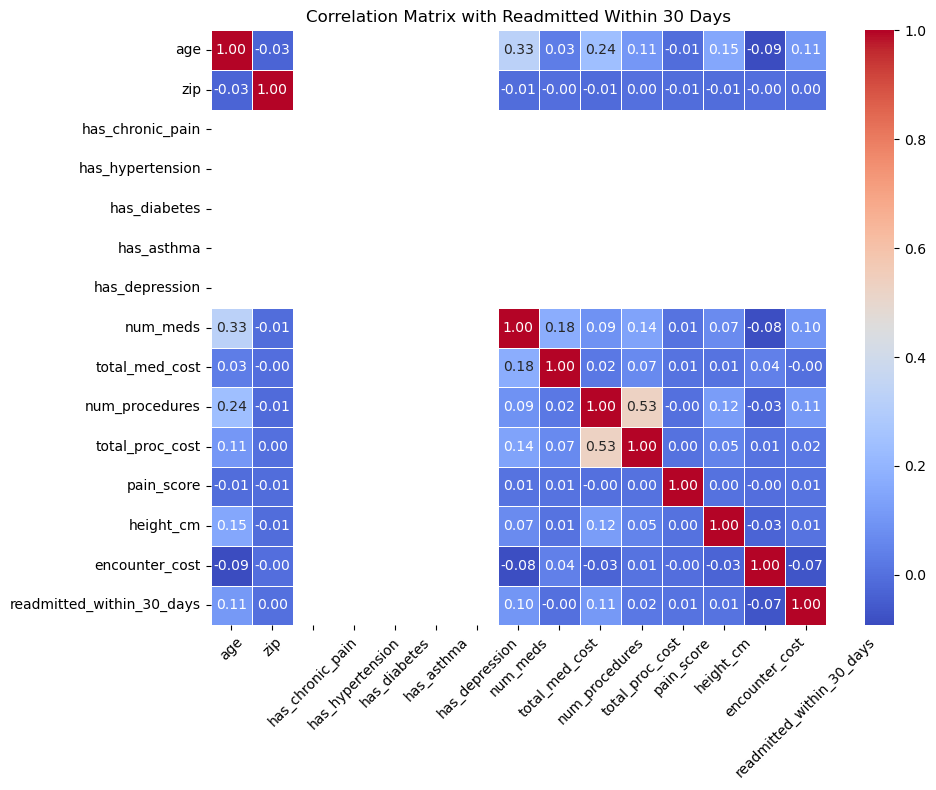

In [303]:
# make df2 then remove all null values
df2 = df.dropna()

# filter columns to only numeric values
df2 = df2.select_dtypes(include=[np.number])

# find the correlation between the column and readmitted in 30 days
correlation = df2.corr()['readmitted_within_30_days'].sort_values(ascending=False)
print(correlation)

# show readmitted within 30 days correlation matrix with other columns only and ensure the text in plot is readable
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Readmitted Within 30 Days')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [304]:
#prints the highest correlation value for readmitted within 30 days using max correlation
max_correlation = df2.corr()['readmitted_within_30_days'].abs().nlargest(2)
print(max_correlation)


readmitted_within_30_days    1.000000
age                          0.110793
Name: readmitted_within_30_days, dtype: float64


It seems the strongest indicator of readmitted within 30 days is age out of other variables. But there are not many good correlations between variables except for num of procedures and total procedure costs. 

I want to group by patient id and see if they are all unique or not. If not, they could be the key to helping with machine learning predicting.

In [305]:
#find unique value in patient_id column and count the number of unique values
unique_patient_ids = df['patient_id'].nunique()
print(f"Number of unique patient IDs: {unique_patient_ids}")

#sum the count of each unique value in the patient_id column into a new data frame named unique_patient_counts
unique_patient_counts = df['patient_id'].value_counts().reset_index()
unique_patient_counts.columns = ['patient_id', 'count']

#print top 10 unique patient counts
unique_patient_counts = unique_patient_counts.sort_values(by='count', ascending=False).head(10)
print("Top 10 unique patient counts:")
print(unique_patient_counts)

Number of unique patient IDs: 11372
Top 10 unique patient counts:
                             patient_id  count
0  19c7d901-62f3-fbda-d9ca-7d740c44e9b4    146
1  3b9c88f4-b86d-73e2-68c8-d70928991684    141
2  720f5bb4-c46d-52b9-61d0-54628c274b51    136
3  d5c0aff1-39a9-9305-e857-cd33a167b69d    132
4  acdb6686-91bf-3a92-05c6-57bc68885b4b    129
5  53f41ed9-68b0-9b5d-d850-02abf713e674    129
6  4d923372-75ee-99e8-32e2-70d879d284ee    129
7  732a89ee-d4b0-6874-ab05-8123bb0ac8a5    127
8  9f9bd9c0-3c41-7b4a-8cbd-79670fbb708f    127
9  a5756eaa-1538-a3ac-a578-cc46613ec807    126


This shows that all patient ids are not unique, thus something to keep in mind for feature engineering.

In [306]:
#group by patient_id and count encounter_id sum for each patient_id then sort from greatest to least
grouped_patient_counts = df.groupby('patient_id')['encounter_id'].count().reset_index()
grouped_patient_counts.columns = ['patient_id', 'encounter_count']
grouped_patient_counts = grouped_patient_counts.sort_values(by='encounter_count', ascending=False)
print("Grouped patient counts:")
print(grouped_patient_counts)

Grouped patient counts:
                                patient_id  encounter_count
1181  19c7d901-62f3-fbda-d9ca-7d740c44e9b4              146
2694  3b9c88f4-b86d-73e2-68c8-d70928991684              141
5115  720f5bb4-c46d-52b9-61d0-54628c274b51              136
9450  d5c0aff1-39a9-9305-e857-cd33a167b69d              132
7718  acdb6686-91bf-3a92-05c6-57bc68885b4b              129
...                                    ...              ...
540   0c467ebb-cd41-a882-86c5-6ed4382d386f                1
8506  bee7eab2-1d53-465b-7eca-5a0372bfffa4                1
7523  a89549c8-b97c-1542-d805-ffdbab91d2f3                1
2220  315f4f0e-e335-4ffe-1fe2-1743e76d096c                1
9098  ccd409bd-b6ed-30d6-3ce4-6dc5bcae63a1                1

[11372 rows x 2 columns]


In [307]:
# find unique values in the encounter_id column and count the number of unique values (to verify)
unique_encounter_ids = df['encounter_id'].nunique()
print(f"Number of unique encounter IDs: {unique_encounter_ids}")

#alright, can verify encounter_id are all unique 

Number of unique encounter IDs: 125958


This shows that encounter_id values are all unique values, thus may consider dropping it since it is purely an ID column when feature engineering. However, the formatted submission seem to require encounter_id, so I may need to drop it only during the test and then include it in the output. Thus, I may keep encounter_id just in case.

In [5]:
#create a new df called df2 then filter columns to only patient id, age, and readmitted within 30 days
df2 = df[['patient_id', 'age', 'readmitted_within_30_days']]

#sort df2 by patient_id
df2 = df2.sort_values(by='patient_id')

#prints df2
print(df2)

                                  patient_id  age  readmitted_within_30_days
76585   0000cac5-ac33-c1c5-c7fa-53b6fb98e4d2   35                          0
10805   0000cac5-ac33-c1c5-c7fa-53b6fb98e4d2   58                          0
28139   0000cac5-ac33-c1c5-c7fa-53b6fb98e4d2   18                          0
27987   0000cac5-ac33-c1c5-c7fa-53b6fb98e4d2   57                          0
86074   0000cac5-ac33-c1c5-c7fa-53b6fb98e4d2   56                          0
...                                      ...  ...                        ...
118327  fff8e91a-5aac-c4d8-563b-5ffed221daa2    6                          0
125101  fff8e91a-5aac-c4d8-563b-5ffed221daa2   14                          0
22893   fff8e91a-5aac-c4d8-563b-5ffed221daa2   10                          1
124922  fff8e91a-5aac-c4d8-563b-5ffed221daa2   12                          1
52672   fff8e91a-5aac-c4d8-563b-5ffed221daa2   12                          1

[125958 rows x 3 columns]


Hmm, okay, while multiple same patient id would likely mean the likelihood of readmitting within 30 days. However, age could also be another indicator to probability of readmitting. If there are multiple patients with recorded same age at least a few times, the chance of being readmitted within 30 days is more likely. For example, let's say there is one patient that is recorded multiple times in the data. But they show varying age indicating they went to the hospital at different times. If there are at least a few cases of that patient going to hospital at their same age, then it is more likely they got readmitted within 30 days. 

So, the age could probably improve machine learning predicting abilities for readmission within 30 days cases.

Lastly, I want to know how well the sample is distributed across population.

In [ ]:
#create a new df called df_class then filter to patient_id, gender, ethnicity, race, and readmitted within 30 days
df_class = df[['patient_id', 'gender', 'ethnicity', 'race', 'readmitted_within_30_days']]

#counts ehtnicity and race unique values
print(df_class['ethnicity'].value_counts())
print(df_class['race'].value_counts())

ethnicity
nonhispanic    87317
hispanic       38641
Name: count, dtype: int64
race
white       103931
native        7804
black         7054
asian         3527
other         1836
hawaiian      1806
Name: count, dtype: int64


Seems, white is overly represented while hawaiian is pretty underrepresented.

Now, general exploratory data analysis is done and I got a pretty good understanding of how data looks.

Now, my task is to "predict whether a patient will be readmitted within 30 days of a previous encounter." I would need to use readmitted_within_30_days as a target variable for the training and predicting, which leaves me features to use.

----------------
**Feature Engineering**

For the feature engineering, to my understanding, they involve transforming data to help improve machine learning models accurately interpret and predict data. For example, zip column isn't very informative unless there is a new column that lists the distance from patient's residence to the hospital via zip code then that makes zip more useful. Unfortunately, the data does not seem to have any columns for that. So, I could probably drop zip column.

1. Real-World Examples of Feature Engineering. https://www.statsig.com/perspectives/real-world-feature-engineering. Accessed 12 May 2025.
2. “What Is Feature Engineering?” GeeksforGeeks, 18:45:10+00:00, https://www.geeksforgeeks.org/what-is-feature-engineering/.

Some possible features to consider:
- readmitted_within_30_days -> readmitted_count (sum) for each unique patient id
- encounter_cost -> encounter_cost_average for each unique patient id
- num_meds_average for each patient
- num_procedures_average for each patient
- total_med_cost_average for each patient
- total_proc_cost_average for each patient
- pain_score_average for each patient

Updated: In my opinion, the best column that could significantly affect the performance is patient ID, because multiple occurance of each patient sometimes could indicate readmission within 30 days (not always) based on my EDA process. So, if I could have a numeric column tallying to indicate reencounter of the patient id (groupby), then it wouldn't hurt too much if I drop encounter_id for the test because all encounter id values are unique, but patient id are not. Hence, I want to try to encode patient id in a way it can be used for the model test instead of aggregating.

When aggregating, each patient id would be merged into one row each. In that case, I may lose a lot of info that could help the machine learning model better predict readmission cases within 30 days. For instance, if I try aggregating which could also includes averaging age, it would likely do harm than help. Because, age can also sometimes be a useful indicator of whether a patient gets readmitted within 30 days if repeated (meaning at least a few recorded cases of a patient of the same age could be the likelihood that they got readmitted within 30 days than not). Additionally, aggregating could lose more other information such as the history of pain scores, total costs of meds and procedures, number of meds and procedures, etc. where they form trends and how they could correlate with the probability of readmission within 30 days. 

Overall, I would avoid aggregating whether possible.

Also, population representation is pretty unbalanced, so I think it'll be helpful to balance the representation when tuning hyperparameters, especially class_weight: "balanced" to improve the accuracy and avoid bias whether possible.

“How Does the Class_weight Parameter in Scikit-Learn Work?” GeeksforGeeks, 12:11:11+00:00, https://www.geeksforgeeks.org/how-does-the-classweight-parameter-in-scikit-learn-work/.

Ultimately, if I have to guess, the best indicators for the likelihood of readmitting within 30 days, it would be patient id, age, and pain scores. Numbers and costs of procedures and meds could probably be indicators too.


Dropped columns:
- zip
- has_chronic_pain
- has_hypertension
- has_diabetes
- has_asthma
- has_depression

Personally, these columns above (dropped) doesn't seem to have meaningful values that help to predict whether patients would readmit in 30 days. Originally, these symptoms columns would be used, but because all values are the same, they probably don't affect the predicting performance for whether patients would readmit within 30 days. Consequently, they're dropped. Additionally, zip doesn't seem to correlate with readmission cases, so that column is also dropped.

**Feature Building**

In [9]:
#name df as df_feature
df_feature = df

#because all symptoms are shown to only have one unique value which may not add much, they will be dropped
df_feature = df_feature.drop(columns=['zip', 'has_chronic_pain', 'has_hypertension', 'has_diabetes', 'has_asthma', 'has_depression'])

In [10]:
#count null values in the df_feature data frame
print(df_feature.isnull().sum())

encounter_id                     0
patient_id                       0
age                              0
gender                           0
race                             0
ethnicity                        0
payer_type                       0
num_meds                     63429
total_med_cost               63429
num_procedures               32744
total_proc_cost              32744
pain_score                   65978
height_cm                    99024
encounter_cost                   0
readmitted_within_30_days        0
dtype: int64


In [17]:
#a lot of null values in the df_feature data frame which may hurt rather than help so Ill imputate the null values with mean for the following columns:
#- num_meds, num_procedures, total_med_cost, total_proc_cost, pain_score, height_cm by average because the sample size is large enough (120,000+)
# so many null values like usually 30-50% so will imputate instead of dropping them all

df_feature['num_meds'].fillna(df_feature['num_meds'].mean(), inplace=True)
df_feature['num_procedures'].fillna(df_feature['num_procedures'].mean(), inplace=True)
df_feature['total_med_cost'].fillna(df_feature['total_med_cost'].mean(), inplace=True)
df_feature['total_proc_cost'].fillna(df_feature['total_proc_cost'].mean(), inplace=True)
df_feature['pain_score'].fillna(df_feature['pain_score'].mean(), inplace=True)
df_feature['height_cm'].fillna(df_feature['height_cm'].mean(), inplace=True)

/var/folders/10/qxz89c3s0cs7jp7w6lcbws440000gn/T/ipykernel_22066/53259672.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_feature['num_meds'].fillna(df_feature['num_meds'].mean(), inplace=True)
/var/folders/10/qxz89c3s0cs7jp7w6lcbws440000gn/T/ipykernel_22066/53259672.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

I want to try different imputer techniques to see which one gives the best ROC AUC score.

In [18]:
#checks null values in the df_feature data frame
print(df_feature.isnull().sum())

encounter_id                 0
patient_id                   0
age                          0
gender                       0
race                         0
ethnicity                    0
payer_type                   0
num_meds                     0
total_med_cost               0
num_procedures               0
total_proc_cost              0
pain_score                   0
height_cm                    0
encounter_cost               0
readmitted_within_30_days    0
dtype: int64


Now feature engineering is done, so I have a feature-engineered data including imputation techniques to use for hyperparameter tuning and tests before training & predicting. Well, to be fair, I haven't added any new columns, but still, I dropped columns I think are not significant for the model test run.

-----------------------
**Cross Validation and Hyperparameter Tuning**

First, I have to check if the feature-engineered data is 'overfitting' or not.

In [ ]:
# prepares data and uses df for simplicity
df = df_feature.copy()
# encode patient_id as frequency (learned about frequency encode and it might be what I need)
df['patient_freq'] = df.groupby('patient_id')['patient_id'].transform('count')
# drop IDs to avoid string conversion issues I encountered
df = df.drop(columns=['encounter_id', 'patient_id'])

# target and features
y = df['readmitted_within_30_days'].astype(int)
X = df.drop(columns=['readmitted_within_30_days'])

# specify feature types
cat_cols = ['gender','race','ethnicity','payer_type']
num_cols = [c for c in X.columns if c not in cat_cols]

# making pipeline for preprocessing
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(),                  num_cols),
], remainder='drop')

# using parameters for random forest classifier
clf = Pipeline([
    ('pre',   preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        min_samples_split=20,
        min_samples_leaf=10,
        max_features='sqrt',
        class_weight='balanced',
        random_state=42
    ))
])

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# fit and evaluate on test set
clf.fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:,1]
print("Hold‑out ROC AUC:", roc_auc_score(y_test, y_proba))

#5‑fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_res = cross_validate(
    clf, X, y,
    cv=cv,
    scoring='roc_auc',
    return_train_score=True,
    n_jobs=-1
)

#prints the train and test auc scores and show the gap to find out if its overfitting
train_auc = np.mean(cv_res['train_score'])
test_auc  = np.mean(cv_res['test_score'])
gap       = train_auc - test_auc

print("Mean CV Train AUC:", train_auc.round(4))
print("Mean CV Test  AUC:", test_auc.round(4))
print("Mean CV AUC gap:  ", gap.round(4))

Hold‑out ROC AUC: 0.8617655947368128
Mean CV Train AUC: 0.9043
Mean CV Test  AUC: 0.8591
Mean CV AUC gap:   0.0453


The gap is not too bad, so it is likely not overfitting, I think parameters I am using might be okay for now since ROC AUC score is a bit over the expected baseline (0.85) with moderately low gap score. Also, I think I found the kind of encode I would need to turn patient_id into a meaningful feature to improve the machine learning modeling and it is **Frequency Encode**.

1. Brownlee, Jason. “How to Identify Overfitting Machine Learning Models in Scikit-Learn.” MachineLearningMastery.Com, 10 Nov. 2020, https://www.machinelearningmastery.com/overfitting-machine-learning-models/.
2. cortax. “Answer to ‘How to Distinguish Overfitting and Underfitting from the ROC AUC Curve?’” Cross Validated, 30 Jan. 2019, https://stats.stackexchange.com/a/389884.
3. Ninja, Neural. “Frequency Encoding: Counting Categories for Representation.” Let’s Data Science, 12 June 2023, https://letsdatascience.com/frequency-encoding/.

Parameters:

    ('model', RandomForestClassifier(
        n_estimators=500,       
        max_depth=None,           
        min_samples_split=20,    
        min_samples_leaf=10,    
        max_features='sqrt',      
        class_weight='balanced',
        random_state=42

Now I want to find few top machine learning model techniques, because I am curious how they would perform compared to each other.

------------------
**Checking DIfferent Machine Learning Model Techniques**

In [20]:
# preparing target and features
df = df_feature.copy()
df['patient_freq'] = df.groupby('patient_id')['patient_id'].transform('count')
df = df.drop(columns=['encounter_id','patient_id','readmitted_within_30_days_frequency'], errors='ignore')

y = df['readmitted_within_30_days'].astype(int)
X = df.drop(columns=['readmitted_within_30_days'])

# defining categorical and numerical columns
cat_cols = ['gender','race','ethnicity','payer_type']
num_cols = [c for c in X.columns if c not in cat_cols]

# 3) preprocessing including one hot encode categorical columns and standard scaling numerical columns
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(),                  num_cols),
], remainder='drop')

# list of models to evaluate and compare
models = {
    "LogisticRegression":   LogisticRegression(solver="liblinear", random_state=42),
    "DecisionTree":         DecisionTreeClassifier(random_state=42),
    "RandomForest":         RandomForestClassifier(n_estimators=200, random_state=42),
    "ExtraTrees":           ExtraTreesClassifier(n_estimators=200, random_state=42),
    "GradientBoosting":     GradientBoostingClassifier(random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "AdaBoost":             AdaBoostClassifier(random_state=42),
    "Bagging":              BaggingClassifier(random_state=42),
    "KNeighbors":           KNeighborsClassifier()
}

# stratified 5‑fold CV splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# loops through models and report ROC AUC + standard deviation for each model
print(f"{'Model':20s}  {'Mean ROC AUC':>12s}   {'Std ROC AUC':>11s}")
for name, model in models.items():
    pipe = Pipeline([
        ('pre',   preprocessor),
        ('model', model)
    ])
    scores = cross_val_score(
        pipe, X, y,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1
    )
    print(f"{name:20s}  {scores.mean():12.4f}   ±{scores.std():.4f}")

Model                 Mean ROC AUC   Std ROC AUC
LogisticRegression          0.7679   ±0.0021
DecisionTree                0.7172   ±0.0036
RandomForest                0.8412   ±0.0015
ExtraTrees                  0.8109   ±0.0021
GradientBoosting            0.8438   ±0.0019
HistGradientBoosting        0.8615   ±0.0020
AdaBoost                    0.7980   ±0.0020
Bagging                     0.8246   ±0.0016
KNeighbors                  0.8009   ±0.0019


Top three best models according to the result are: randomforest, gradientboosting, and histgradientboosting. HistGradientBoosting has the best ROC AU score, but RandomForest is quite close with a slightly lower STD. I may consider using RandomForest for simplicity.

----------------------------
**Model Training and Testing Results and Conclusion**

Overall, I've cleaned up data by dropping columns that may not affect as much:
- zip
- has_chronic_pain
- has_hypertension
- has_diabetes
- has_asthma
- has_depression

I've encoded patient to be a frequency column by their id and chose to keep encounter_id, but will drop during feature engineering to avoid categorical variables issues with string conversion to float. 

Best hyperparameters I believe for RandomForest giving good ROC AUC score without overfitting too much again are:

**RandomForestClassifier**
- n_estimators=200 (adjusted lower from 500 to 200 since the model test via train_predict.py is taking quite long)
- max_depth=None
- min_samples_split=20
- min_samples_leaf=10
- max_features='sqrt'
- class_weight='balanced'
- random_state=42

With the dev.csv, my ROC AUC score was around ~0.83 compared to the score of ~0.9011 from codabench website: https://www.codabench.org/competitions/6813/?secret_key=d147b095-0fde-4709-a898-f648c27bbe3a#/results-tab

With test.csv, my ROC AUC was around ~0.85 which would suggest my model was holding up quite well despite test.csv being an unseen data.


So far, I've learned quite a lot about the machine learning process when I work through in this project.

From what I understand, we start by collecting 'raw' data, then clean up data to prepare for machine learning. How we would transform data would depend on the goal. The goal is to predict whether patients would get readmitted within 30 days from a previous encounter. 

Honestly, I thought at first I would group by patient_id as a feature to tally their readmission within 30 days. Then the model could better predict. However, I performed pretty poorly with a score of around 0.69. I think my first attempt was focusing too much on who rather than readmission on other factors. So, I tried again and instead encoded patient by frequency count rather than grouping by patient_id ordinarily which might also group many other columns too, to my understanding. I additionally dropped unnecessary columns. What remained the same was imputating null values with mean since the sample sizing was very large. Overall, how we would clean data and also add new features (aggregating, dropping, etc.) can have a great effect on how machine learning performs with predicting.

Next, I ran cross validation test with the working feature-engineered data and it performed quite well with a gap ROC AUC score of around 0.04 which is not too bad since it means the data is not that 'overfitting'. Before then, it didn't perform well. It had a perfect score of 1 with no gap which means there was a possible data leakage. I did try to aggregate by patient_id and tally through readmitted_within_30_days column ONLY if value = 1, but I think that was at fault so I removed that code and now it has a pretty legitimate CV score and a small gap. So, I went ahead with this feature-engineered data

I was also curious how other kinds of machine learning techniques performed. RandomForest to my surprise was one of top 3 among HistGradientBoosting and GradientBoosting. I decided to use RandomForest since it was also used by a default ds.py and it has a very close score to HistGradientBoosting as one with the highest ROC AUC score.

After running the actual model test with both dev.csv and test.csv, the score was around 0.84 average from ~0.83 and ~0.85 respectively. It would mean that if you randomly pick one encounter that was readmitted within 30 days and one that wasn’t, the model will correctly assign a higher readmission risk to the true‑readmission case about 84% of the time.

For the score of ~0.9 from the codabench website, it would correctly assign a higher readmission risk to the true readmission case about 90% of the time (development phase). For the testing phase according to the codabench website, I got a score of 0.858 which is still a pretty decent score since it performs pretty well despite it working on an unseen data. 